In [1]:
import pickle5 as pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

noise_rates = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1]
seeds = [42, 35, 936, 235, 464, 912, 445, 202, 19, 986]

In [2]:
with open("metrics/metrics_ova.pickle", "rb") as f:
    metrics_ova = pickle.load(f)
print(len(metrics_ova[0]))

with open("metrics/metrics_softmax.pickle", "rb") as f:
    metrics_softmax = pickle.load(f)
print(len(metrics_softmax[0]))

10
10


In [3]:
def get_mean_std_analytics(metrics):
    avg_std_error_rates = dict()
    important_metrics = ["coverage", "system_accuracy", "expert_accuracy", "classifier_accuracy", "alone_classifier", "validation_loss", "expert_0"]

    for i, noise in enumerate(noise_rates):
        error_rate_dict = {'coverage': dict(), 'system_accuracy': dict(), 'expert_accuracy': dict(), 'classifier_accuracy': dict(), 'alone_classifier': dict(), 'validation_loss': dict(), 'n_experts': dict(), 'expert_0': dict()}
        for key in important_metrics:
            values = [metrics[i][j][key] for j in range(len(metrics[0]))]
            error_rate_dict[key]["values"] = values
            error_rate_dict[key]["Mean"] = sum(values)/len(values)
            error_rate_dict[key]["std"] = np.std(values)
        avg_std_error_rates[noise] = error_rate_dict

    return avg_std_error_rates

In [4]:
avg_std_error_rates_softmax = get_mean_std_analytics(metrics_softmax)
avg_std_error_rates_ova = get_mean_std_analytics(metrics_ova)
avg_std_error_rates_list = [avg_std_error_rates_softmax, avg_std_error_rates_ova]
losses = ["softmax", "ova"]

In [5]:
def plot_metrics(metric, ylim):
    for i, loss in enumerate(avg_std_error_rates_list):
        plt.title(f"{metric} vs Noise rate with {losses[i]}")
        plt.violinplot([loss[error_rate][metric]["values"] for error_rate in loss])
        plt.plot([1, 2, 3, 4, 5, 6], [loss[error_rate][metric]["Mean"] for error_rate in loss], c="b")
        plt.ylim(ylim[i])
        plt.ylabel("Coverage percentage")
        plt.xlabel("Noise rate")
        plt.xticks([1, 2, 3, 4, 5, 6], noise_rates)
        plt.grid()
        
        plt.show()

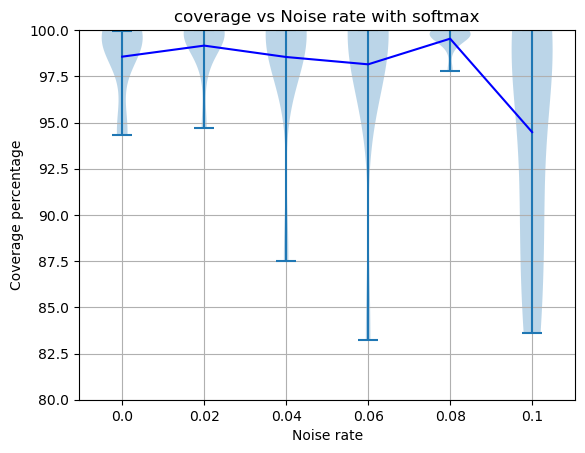

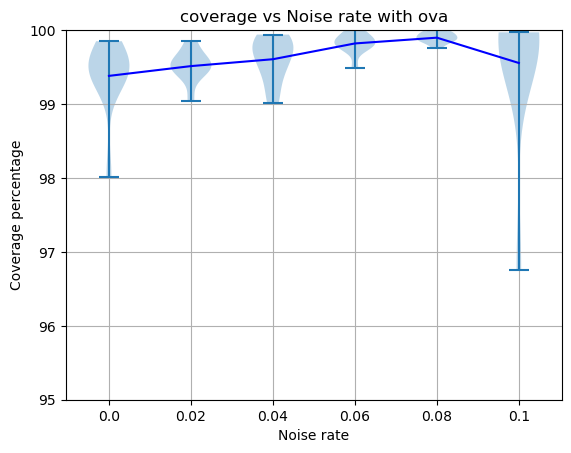

In [6]:
plot_metrics("coverage", [(80, 100), (95, 100)])

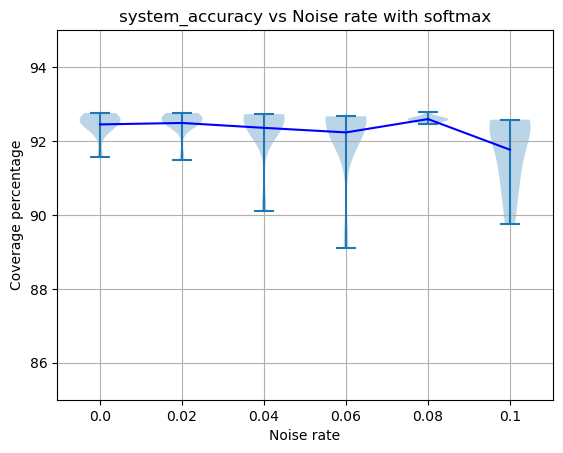

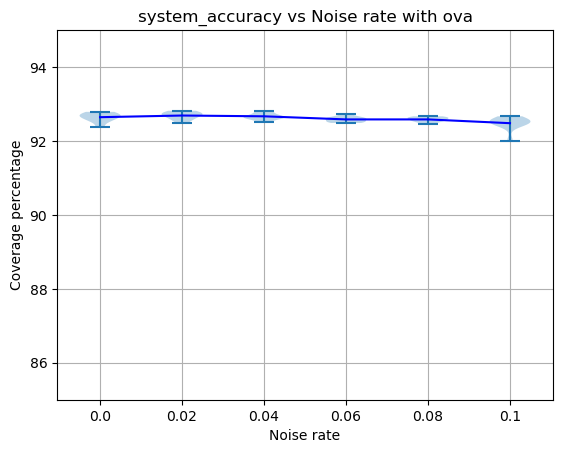

In [7]:
plot_metrics("system_accuracy", [(85, 95), (85, 95)])

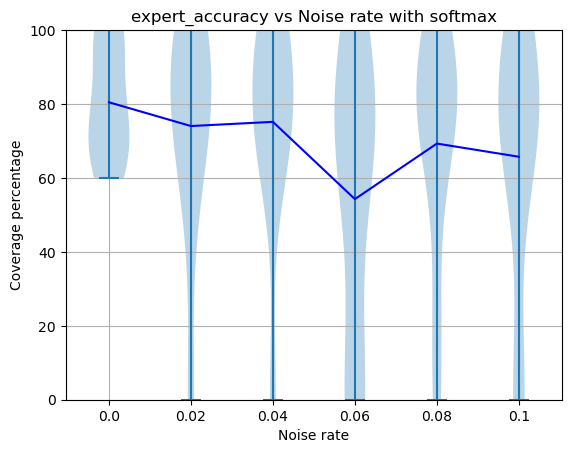

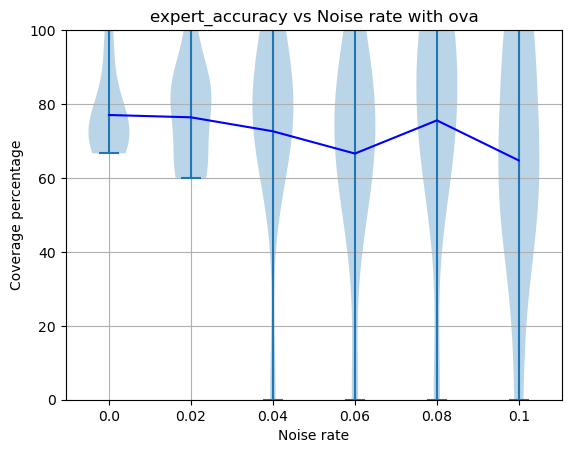

In [8]:
plot_metrics("expert_accuracy", [(0, 100), (0, 100)])

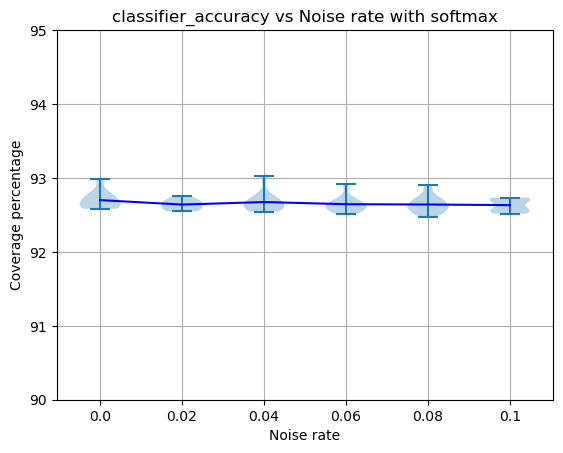

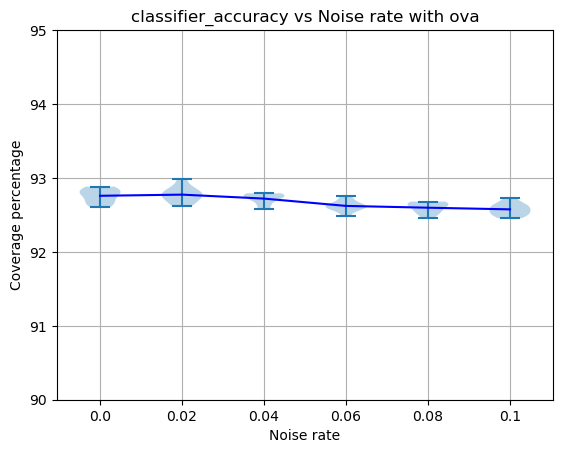

In [9]:
plot_metrics("classifier_accuracy", [(90, 95), (90, 95)])